#On fait les imports 

In [2]:
import numpy as np
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import os
import zipfile

import matplotlib.pylab as plt

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from keras.applications.resnet50 import decode_predictions
from IPython.display import Image, display
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array

from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# INIT STUFF


In [4]:
#SUR COLOAB
# local_zip = '/content/drive/MyDrive/dog_ia/dataset.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()


In [5]:
INPUT_SIZE = 224
NUM_CLASSES = 120
SEED = 42

base_dir = './dataset' # sur colab : /tmp/dataset
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
labels = os.listdir(train_dir)

# PREPARING SOME IMAGES TO TEST ON RESNET50 RAW

In [6]:
imgs_path = []
breeds = os.listdir(train_dir)

for breed in breeds:
  for image in os.listdir(os.path.join(train_dir, breed)):
    imgs_path.append(os.path.join(train_dir, breed, image))
imgs_path[:3]

['/tmp/dataset/train/n02108000-EntleBucher/n02108000_316.jpg',
 '/tmp/dataset/train/n02108000-EntleBucher/n02108000_2125.jpg',
 '/tmp/dataset/train/n02108000-EntleBucher/n02108000_619.jpg']

In [ ]:
imgs_path[0]

'/tmp/dataset/train/n02115641-dingo/n02115641_3977.jpg'

In [7]:
def read_and_prep_images(img_paths, img_height=224, img_width=224):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

### Importing the model

In [8]:
my_model = ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


### Testing on some images to see if its accurate

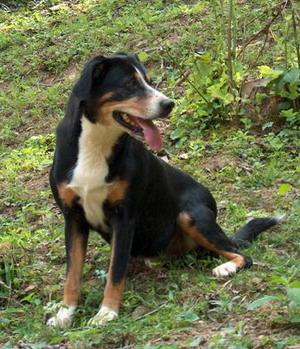

[('n02108000', 'EntleBucher', 0.47942513), ('n02107908', 'Appenzeller', 0.45179957), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.06564358)]
/tmp/dataset/train/n02108000-EntleBucher/n02108000_316.jpg


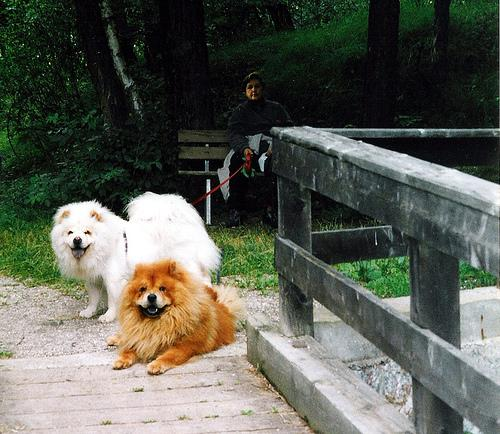

[('n02112137', 'chow', 0.7343997), ('n02112018', 'Pomeranian', 0.097427756), ('n02111500', 'Great_Pyrenees', 0.054750245)]
/tmp/dataset/train/n02112137-chow/n02112137_2376.jpg


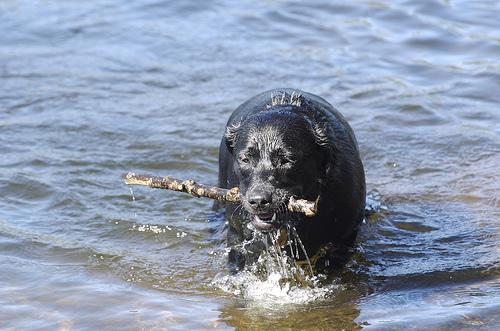

[('n02099267', 'flat-coated_retriever', 0.87676686), ('n02099429', 'curly-coated_retriever', 0.07590871), ('n02105056', 'groenendael', 0.015913045)]
/tmp/dataset/train/n02099712-Labrador_retriever/n02099712_2120.jpg


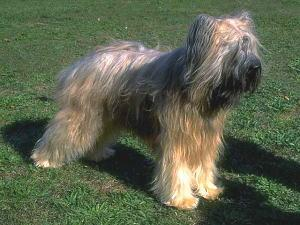

[('n02105251', 'briard', 0.999074), ('n02097474', 'Tibetan_terrier', 0.0008049914), ('n02098105', 'soft-coated_wheaten_terrier', 3.802827e-05)]
/tmp/dataset/train/n02105251-briard/n02105251_1382.jpg


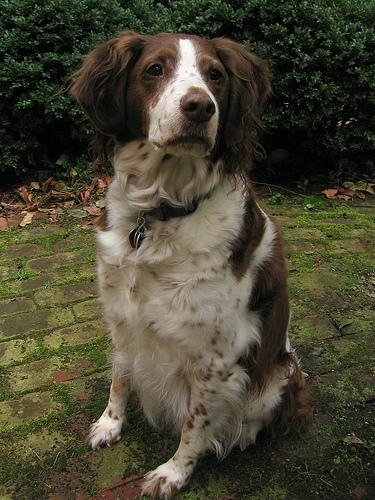

[('n02101388', 'Brittany_spaniel', 0.8233459), ('n02102040', 'English_springer', 0.15580116), ('n02106166', 'Border_collie', 0.005363022)]
/tmp/dataset/train/n02101388-Brittany_spaniel/n02101388_3344.jpg


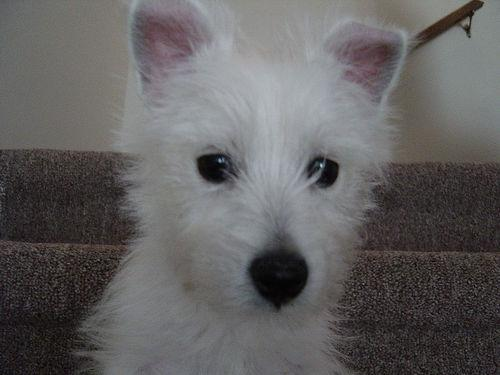

[('n02098286', 'West_Highland_white_terrier', 0.9606019), ('n02097298', 'Scotch_terrier', 0.03129852), ('n02096177', 'cairn', 0.0036071043)]
/tmp/dataset/train/n02098286-West_Highland_white_terrier/n02098286_4568.jpg


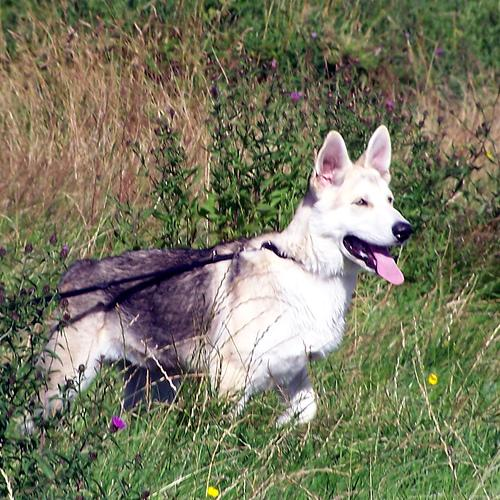

[('n02109961', 'Eskimo_dog', 0.5260462), ('n02110185', 'Siberian_husky', 0.22512807), ('n02110063', 'malamute', 0.12995262)]
/tmp/dataset/train/n02109961-Eskimo_dog/n02109961_8187.jpg


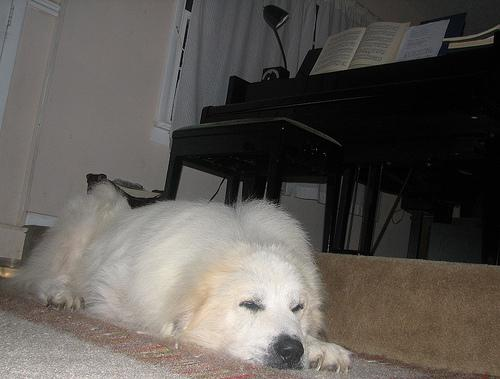

[('n02111500', 'Great_Pyrenees', 0.98415935), ('n02111889', 'Samoyed', 0.007756409), ('n02104029', 'kuvasz', 0.0015387266)]
/tmp/dataset/train/n02111500-Great_Pyrenees/n02111500_2668.jpg


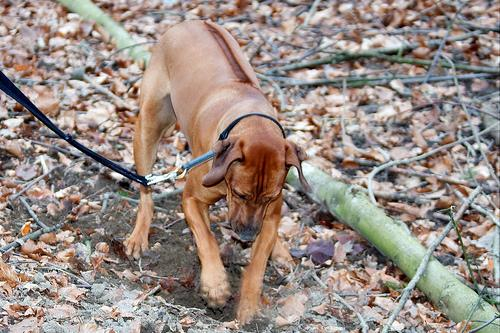

[('n02090379', 'redbone', 0.37483343), ('n02087394', 'Rhodesian_ridgeback', 0.298545), ('n02100583', 'vizsla', 0.29053718)]
/tmp/dataset/train/n02087394-Rhodesian_ridgeback/n02087394_3458.jpg


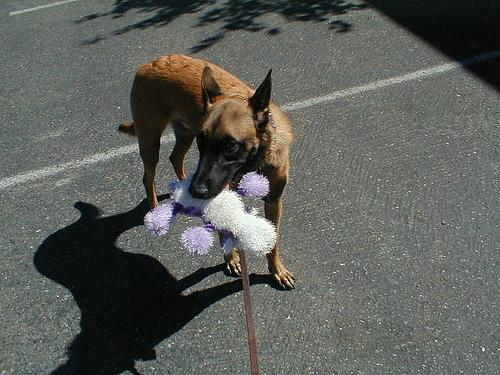

[('n02105162', 'malinois', 0.99711037), ('n02115641', 'dingo', 0.00041982072), ('n02108089', 'boxer', 0.0003906429)]
/tmp/dataset/train/n02105162-malinois/n02105162_9410.jpg


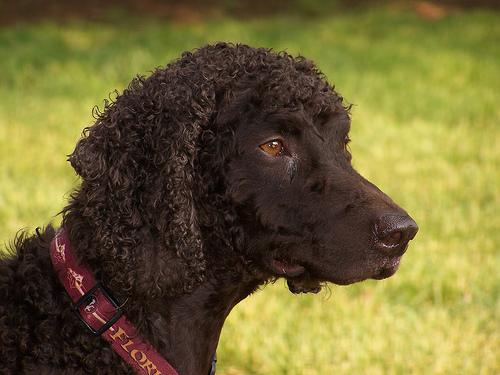

[('n02102973', 'Irish_water_spaniel', 0.81216747), ('n02099429', 'curly-coated_retriever', 0.18734282), ('n02113799', 'standard_poodle', 0.00043224747)]
/tmp/dataset/train/n02102973-Irish_water_spaniel/n02102973_1615.jpg


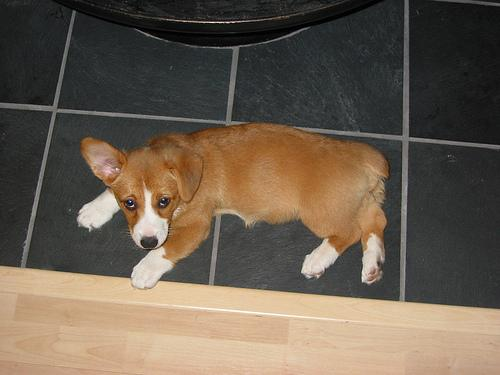

[('n02113023', 'Pembroke', 0.9712387), ('n02113186', 'Cardigan', 0.028059399), ('n02110806', 'basenji', 0.0005982877)]
/tmp/dataset/train/n02113023-Pembroke/n02113023_6655.jpg


In [34]:
test_data = read_and_prep_images(imgs_path[::1000])
preds = my_model.predict(test_data)

most_likely_labels = decode_predictions(preds, top=3)

for i, img_path in enumerate(imgs_path[::1000]):
    display(Image(img_path))
    print(most_likely_labels[i])
    print(img_path)

# TRAINING THE RESNET50 MODEL TO BECOME BETTER ON OUR SET OF DATA

## PERAPARING THE DATA TO TRAIN THE MODEL

In [11]:
LABELS = set()
paths = []

for d in os.listdir(train_dir):
  LABELS.add(d)
  paths.append((train_dir+"/"+d, d))

In [12]:
def load_and_preprocess_image(path):
  image = cv2.imread(path)
  image = cv2.resize(image, (224,224))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [13]:
X = []
y = []

for path, label in paths:
  for image_path in os.listdir(path):
    image = load_and_preprocess_image(path+"/"+image_path)
    X.append(image)
    y.append(label)

In [14]:
encoder = LabelBinarizer()

X = np.array(X)
y = encoder.fit_transform(np.array(y))
print(y[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


(12000, 224, 224, 3)
(12000, 120)


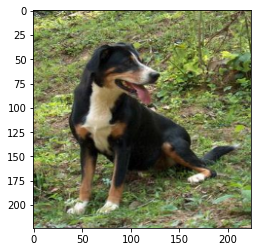

In [15]:
print(X.shape)
print(y.shape)
plt.imshow(X[0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## REMOVING THE LAST 5 LAYERS AND REPLACING THEM WITH OURS

In [17]:
base_model=ResNet50(include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(512,activation='relu')(x)
preds=Dense(len(LABELS),activation='softmax')(x)

model=keras.Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:-5]:
    layer.trainable=False
for layer in model.layers[-5:]:
    layer.trainable=True
    
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

94773248/94765736 [==============================] - 1s 0us/step


### Some callbacks to help us monitor

In [18]:
early_stopping = EarlyStopping(patience=5, verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)

### **FInally the training**

In [40]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
169/169 [==============================] - 75s 446ms/step - loss: 0.1637 - accuracy: 0.9486 - val_loss: 1.7390 - val_accuracy: 0.6225
Epoch 2/50
169/169 [==============================] - 75s 443ms/step - loss: 0.1613 - accuracy: 0.9489 - val_loss: 1.7398 - val_accuracy: 0.6225
Epoch 3/50
169/169 [==============================] - 75s 444ms/step - loss: 0.1575 - accuracy: 0.9529 - val_loss: 1.7412 - val_accuracy: 0.6225
Epoch 4/50
169/169 [==============================] - 75s 444ms/step - loss: 0.1574 - accuracy: 0.9511 - val_loss: 1.7424 - val_accuracy: 0.6225

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 5/50
169/169 [==============================] - 75s 444ms/step - loss: 0.1567 - accuracy: 0.9516 - val_loss: 1.7424 - val_accuracy: 0.6225
Epoch 6/50
169/169 [==============================] - 75s 443ms/step - loss: 0.1532 - accuracy: 0.9533 - val_loss: 1.7426 - val_accuracy: 0.6225
Restoring model weights from the end of the best

In [50]:
model.save("/content/drive/MyDrive/dog_ia/best_pred_euw.h5")

Text(0.5, 1.0, 'Trainnig validation annd loss')

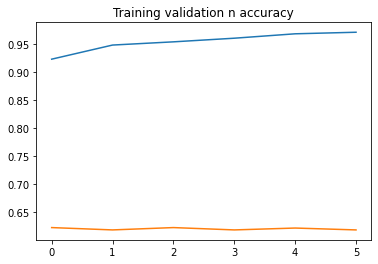

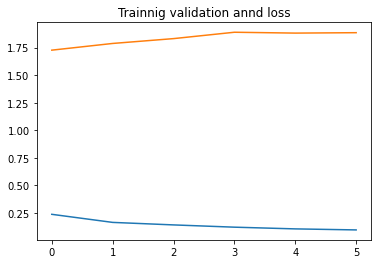

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training validation n accuracy")

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Trainnig validation annd loss")

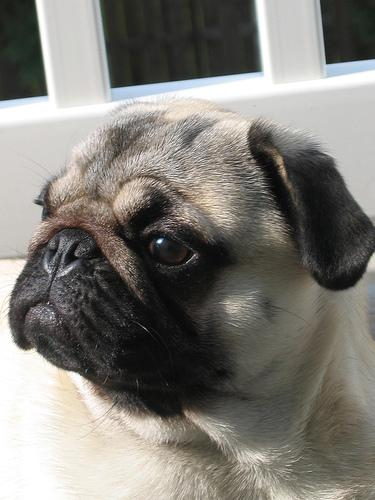

sans entrainement [('n02110958', 'pug', 0.98521495), ('n02108422', 'bull_mastiff', 0.0033647881), ('n02112706', 'Brabancon_griffon', 0.0032913599)]
après entrainement n02110958-pug
la vérité /tmp/dataset/train/n02110958-pug/n02110958_353.jpg


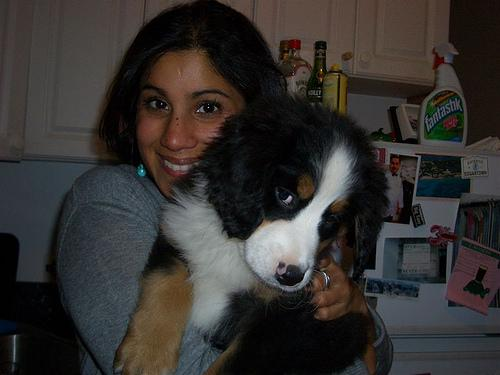

sans entrainement [('n02107683', 'Bernese_mountain_dog', 0.9946314), ('n02105855', 'Shetland_sheepdog', 0.0024936146), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.0006516873)]
après entrainement n02107683-Bernese_mountain_dog
la vérité /tmp/dataset/train/n02107683-Bernese_mountain_dog/n02107683_4364.jpg


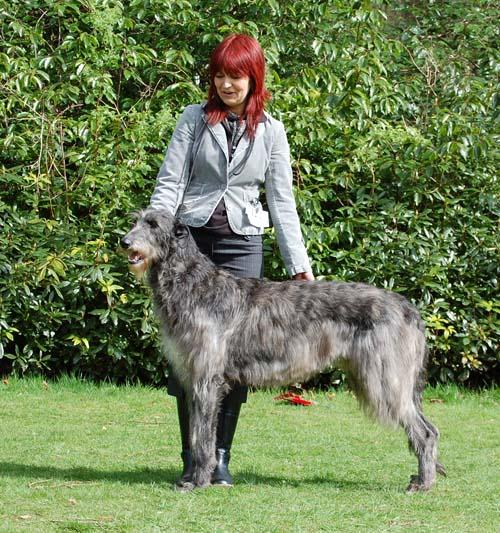

sans entrainement [('n02092002', 'Scottish_deerhound', 0.87172943), ('n02090721', 'Irish_wolfhound', 0.12746249), ('n02090622', 'borzoi', 0.00038558358)]
après entrainement n02092002-Scottish_deerhound
la vérité /tmp/dataset/train/n02092002-Scottish_deerhound/n02092002_9071.jpg


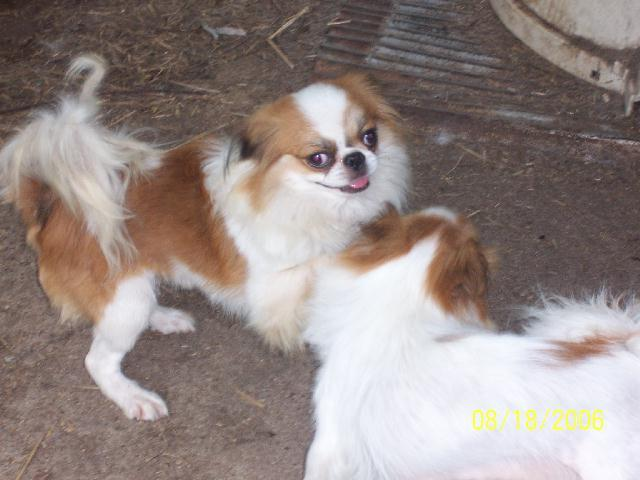

sans entrainement [('n02086910', 'papillon', 0.67387116), ('n02086646', 'Blenheim_spaniel', 0.27346978), ('n02085782', 'Japanese_spaniel', 0.04567097)]
après entrainement n02085782-Japanese_spaniel
la vérité /tmp/dataset/train/n02085782-Japanese_spaniel/n02085782_2635.jpg


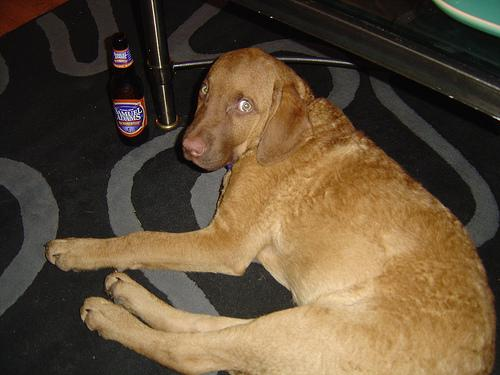

sans entrainement [('n02099849', 'Chesapeake_Bay_retriever', 0.96342677), ('n02100583', 'vizsla', 0.018107906), ('n02093991', 'Irish_terrier', 0.0016890655)]
après entrainement n02099712-Labrador_retriever
la vérité /tmp/dataset/train/n02099849-Chesapeake_Bay_retriever/n02099849_4726.jpg


In [51]:
import random
test_array = random.sample(imgs_path, 5)
test_data = read_and_prep_images(test_array)
preds = model.predict(test_data)
preds2 = my_model.predict(test_data)

label_predictions = encoder.inverse_transform(preds, 0.5)
labelll = decode_predictions(preds2, 3)

for i, img_path in enumerate(test_array):
    display(Image(img_path))
    print("sans entrainement", labelll[i])
    print("après entrainement",label_predictions[i])
    print("la vérité",img_path)

In [49]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print(f"loss on the test set is {loss:.2f}")
print(f"accuracy on the test set is {acc:.3f}")

loss on the test set is 1.74
accuracy on the test set is 0.623
